In [17]:
import pickle

# We used "train.pkl" for presentation however after assumption made was questionned
# we changed it to time_series data for further tests
file_path = 'train_ts.pkl'
with open(file_path, 'rb') as file:
    train_data = pickle.load(file)

train_data.head()


,date,exchange,q,ticker,transcript,daily_r,weekly_r,monthly_r
0,2017-11-03 00:00:00,NYSE: HOUS,2017-Q3,HOUS,prepared remark operator good morning welcome ...,-0.012159,-0.026898,-0.028371
1,2017-11-13 00:00:00,NYSE: ACM,2017-Q4,ACM,prepared remark operator good morning welcome ...,0.014994,0.060842,0.079296
2,2017-11-14 00:00:00,NYSE: ARMK,2017-Q4,ARMK,prepared remark operator lady gentleman thank ...,-0.032037,0.005869,0.050379
3,2017-11-21 00:00:00,NYSE: NJR,2017-Q4,NJR,prepared remark operator good day welcome new ...,-0.002242,0.000000,-0.110986
4,2017-11-22 00:00:00,NYSE: DE,2017-Q4,DE,prepared remark operator welcome good morning ...,0.004123,0.044390,0.099773


In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10601 entries, 0 to 10600
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        10601 non-null  object 
 1   exchange    10601 non-null  object 
 2   q           10601 non-null  object 
 3   ticker      10601 non-null  object 
 4   transcript  10601 non-null  object 
 5   daily_r     10601 non-null  float64
 6   weekly_r    10601 non-null  float64
 7   monthly_r   10601 non-null  float64
dtypes: float64(3), object(5)
memory usage: 662.7+ KB


In [19]:
train_data['transcript'].iloc[0]

'prepared remark operator good morning welcome realogy holding corporation thirdquarter 2017 earnings conference call via webcast today call recorded written transcript made available investor information section company website later today webcast replay also made available company website time would like turn call realogy senior vice president alicia swift please go ahead alicia alicia swift senior vice president thank amy good morning welcome realogys thirdquarter 2017 earnings conference call call today realogys realogys chairman ceo president richard smith president chief operating officer ryan schneider chief financial officer tony hull shown slide three presentation company making statement future result forwardlooking statement call statement based current expectation current economic environment forwardlooking statement projection inherently subject significant economic competitive uncertainty contingency many beyond control management actual result may differ materially expre

In [20]:
# Splitting into classes based on weekly returns 
def class_setup(df, r1, r2):
    df['class'] = 2  # Default class
    df.loc[df['weekly_r'] > r1, 'class'] = 1
    df.loc[df['weekly_r'] < r2, 'class'] = 3
    return df 

In [21]:
train_data = class_setup(train_data, 0.03, -0.03) 

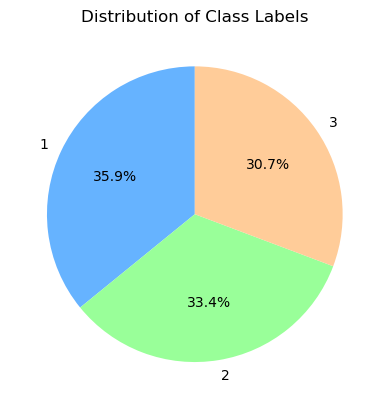

In [22]:
import matplotlib.pyplot as plt

# Assuming 'train_data' is your DataFrame and 'class' is the column with class labels
class_distribution = train_data['class'].value_counts()

# Define a list of colors for the pie chart; add more colors if you have more than five classes
colors = ['#66b3ff', '#99ff99', '#ffcc99', '#ff6666', '#c2c2f0']

# Plotting the class distribution as a pie chart
class_distribution.plot(kind='pie', autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Distribution of Class Labels')
plt.ylabel('')  # Hide the y-label as it's not necessary for pie charts
plt.show()

In [23]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import names   

# Adding more specific stop words 
all_names = set(names.words())
custom_stop_words = list(ENGLISH_STOP_WORDS) + ['chief', 'executive', 'financial', 'officer', 'president', 'vice', 'quarter', 'year', 'morning', 'think', 'analyst','chairman']
custom_stop_words = custom_stop_words + list(all_names)

# Constructing vectorizer and using it to vectorize the data
vectorizer = TfidfVectorizer(stop_words=custom_stop_words, min_df=0.05, max_df=0.8, max_features=500, ngram_range=(1, 2))
vectorized_data = vectorizer.fit_transform(train_data['transcript'])


c:\Users\georg\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aamir', 'aaron', 'abagael', 'abagail', 'abbe', 'abbey', 'abbi', 'abbie', 'abbot', 'abbott', 'abby', 'abdel', 'abdul', 'abdulkarim', 'abdullah', 'abe', 'abel', 'abelard', 'abigael', 'abigail', 'abigale', 'abner', 'abra', 'abraham', 'abram', 'acacia', 'ace', 'ada', 'adah', 'adair', 'adaline', 'adam', 'adams', 'adara', 'addie', 'addis', 'adel', 'adela', 'adelaide', 'adele', 'adelice', 'adelina', 'adelind', 'adeline', 'adella', 'adelle', 'adena', 'adey', 'adger', 'adi', 'adiana', 'adina', 'aditya', 'adlai', 'adnan', 'adolf', 'adolfo', 'adolph', 'adolphe', 'adolpho', 'adolphus', 'adora', 'adore', 'adoree', 'adorne', 'adrea', 'adria', 'adriaens', 'adrian', 'adriana', 'adriane', 'adrianna', 'adrianne', 'adrick', 'adrien', 'adriena', 'adrienne', 'aeriel', 'aeriela', 'aeriell', 'ag', 'agace', 'ag

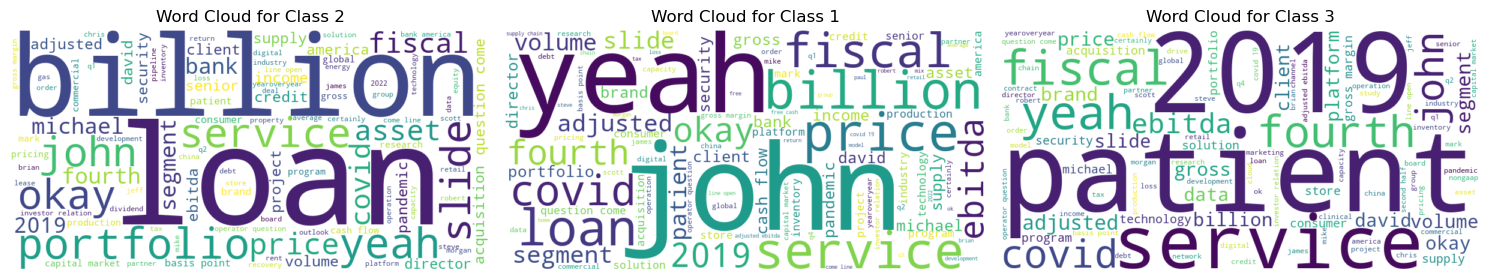

In [24]:
import numpy as np
from wordcloud import WordCloud

feature_names = vectorizer.get_feature_names_out()

classes = train_data['class'].unique()

plt.figure(figsize=(15, 10))

for i, label in enumerate(classes):
    class_rows = train_data['class'] == label
    class_term_matrix = vectorized_data[class_rows]
    class_term_freq = np.array(class_term_matrix.sum(axis=0)).flatten()
    
    freq_dict = dict(zip(feature_names, class_term_freq))
    
    # Generate WordCloud
    class_wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white', random_state=42).generate_from_frequencies(freq_dict)
    
    plt.subplot(2, 3, i + 1) 
    plt.imshow(class_wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Class {label}')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import accuracy_score, classification_report

# Split the train data into train and validation sets
tr_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

X_train = vectorizer.fit_transform(tr_data['transcript'])
X_val = vectorizer.transform(val_data['transcript'])
y_train = tr_data['class']
y_val = val_data['class']

# Train a MNB classifier
mnb = MultinomialNB(alpha=0.05, fit_prior=True)
mnb.fit(X_train, y_train)

# Predict on the validation set
y_pred_mnb = mnb.predict(X_val)

# Evaluation
print("Multinomial Naive Bayes")
print("Accuracy:", accuracy_score(y_val, y_pred_mnb))
print(classification_report(y_val, y_pred_mnb))

# Train a CNB classifier
cnb = ComplementNB(alpha=0.05, fit_prior=True)
cnb.fit(X_train, y_train)

# Predict on the validation set
y_pred_cnb = cnb.predict(X_val)

# Evaluation
print("Complement Naive Bayes")
print("Accuracy:", accuracy_score(y_val, y_pred_cnb))
print(classification_report(y_val, y_pred_cnb))

Multinomial Naive Bayes
Accuracy: 0.4031117397454031
              precision    recall  f1-score   support

           1       0.38      0.46      0.42       763
           2       0.43      0.41      0.42       707
           3       0.42      0.32      0.36       651

    accuracy                           0.40      2121
   macro avg       0.41      0.40      0.40      2121
weighted avg       0.41      0.40      0.40      2121

Complement Naive Bayes
Accuracy: 0.39085337105139084
              precision    recall  f1-score   support

           1       0.39      0.17      0.23       763
           2       0.39      0.49      0.44       707
           3       0.39      0.55      0.45       651

    accuracy                           0.39      2121
   macro avg       0.39      0.40      0.37      2121
weighted avg       0.39      0.39      0.37      2121



In [26]:
y_train = train_data['class']

# Train a MNB classifier
mnb = MultinomialNB(alpha=0.05, fit_prior=True, force_alpha=True)
mnb.fit(vectorized_data, y_train)

MultinomialNB(alpha=0.05, force_alpha=True)

In [27]:
import pandas as pd
# Loading the test data
test_data = pd.read_pickle('test_ts.pkl')

test_data.head()

,date,exchange,q,ticker,transcript,daily_r,weekly_r,monthly_r
10601,2021-11-02 00:00:00,NASDAQ: ZYXI,2021-Q3,ZYXI,prepared remark operator good day welcome zyne...,-0.030977,0.134234,-0.249404
10602,2021-11-02 00:00:00,NYSE: COUR,2021-Q3,COUR,prepared remark operator lady gentleman thank ...,-0.023762,-0.029137,-0.280905
10603,2021-11-02 00:00:00,NASDAQ: OTTR,2021-Q3,OTTR,prepared remark operator good morning welcome ...,-0.007384,0.053417,0.060644
10604,2021-11-02 00:00:00,NYSE: AYX,2021-Q3,AYX,prepared remark operator greeting welcome alte...,-0.006112,-0.011959,-0.174196
10605,2021-11-02 00:00:00,NYSE: RAMP,2022-Q2,RAMP,prepared remark operator good afternoon lady g...,0.032662,-0.034295,-0.144257


In [28]:
X_test = vectorizer.transform(test_data['transcript'])

# Predict the classes for the test set
predicted_classes = mnb.predict(X_test)
test_data['predicted_class'] = predicted_classes

print(test_data.head())

                      date      exchange        q ticker  \
10601  2021-11-02 00:00:00  NASDAQ: ZYXI  2021-Q3   ZYXI   
10602  2021-11-02 00:00:00    NYSE: COUR  2021-Q3   COUR   
10603  2021-11-02 00:00:00  NASDAQ: OTTR  2021-Q3   OTTR   
10604  2021-11-02 00:00:00     NYSE: AYX  2021-Q3    AYX   
10605  2021-11-02 00:00:00    NYSE: RAMP  2022-Q2   RAMP   

                                              transcript   daily_r  weekly_r  \
10601  prepared remark operator good day welcome zyne... -0.030977  0.134234   
10602  prepared remark operator lady gentleman thank ... -0.023762 -0.029137   
10603  prepared remark operator good morning welcome ... -0.007384  0.053417   
10604  prepared remark operator greeting welcome alte... -0.006112 -0.011959   
10605  prepared remark operator good afternoon lady g...  0.032662 -0.034295   

       monthly_r  predicted_class  
10601  -0.249404                1  
10602  -0.280905                1  
10603   0.060644                2  
10604  -0.1741

In [29]:
# Count the occurrences of each coefficient
coefficient_counts = test_data['predicted_class'].value_counts()
print(coefficient_counts)

predicted_class
1    3724
2     840
3     636
Name: count, dtype: int64


In [30]:
from sklearn.metrics import confusion_matrix

df_test = class_setup(test_data, 0.03, -0.03)
y_true = df_test['class'] 
y_pred = test_data['predicted_class']

confusion_matrix(y_true, y_pred)

array([[1315,  228,  221],
       [ 917,  339,  138],
       [1492,  273,  277]], dtype=int64)

In [31]:
# Mapping classes to coefficients
class_to_coefficient = {
    1: -1,
    2: 0,
    3: 1
}

# Map the predicted class labels to coefficients
test_data['alpha'] = test_data['predicted_class'].map(class_to_coefficient)

print(test_data[['weekly_r', 'alpha']])

       weekly_r  alpha
10601  0.134234     -1
10602 -0.029137     -1
10603  0.053417      0
10604 -0.011959     -1
10605 -0.034295      1
...         ...    ...
15796 -0.027466     -1
15797  0.123006     -1
15798 -0.063051     -1
15799  0.015778      0
15800  0.023748      0

[5200 rows x 2 columns]


In [ ]:
#Saving strategy coefficients
df = test_data[['alpha']]

df.to_csv('C:/Users/georg/IF Master/MA2/ML/final proj/multinomial_naive_bayes.csv', index=True)